#### Monte-Carlo simulation of the aquarium problem

Simulate the aquarium problem `nsamples` times over 10 weeks of sales.

In [1]:
import numpy as np
import random as rdm
    

# Create a Poisson distribution using the discrete event method

Lambda=1; m=3;
d=5; s=20;
rho=0.01; c=60;

nweeks = 1000000
ignore_weeks = 50 # ignore the first 50 weeks

weeks = nweeks-ignore_weeks


def policy(x,t,L):
    return (x<t)*np.max([L-x,0])

def policy_short(t,L):
    """
    The short form of the policy is a vector [ p[0], p[1], p[2], ...] meaning the following:
    * X = 0 => order p[0] aquariums
    * X = 1 => order p[1] aquariums
    * X = 2 => order p[2] aquariums
    ...
    
    """
    P=np.zeros(m+1)
    for i in range(m+1):
        P[i] = (i<t)*np.max([L-i,0])
    return P


t_n=np.zeros(int(m*(m+1)/2))
L_n=np.zeros(int(m*(m+1)/2))
mu_n=np.zeros(int(m*(m+1)/2))
V_n=np.zeros(int(m*(m+1)/2))

labels=[]

i=0
for t in range(1,m+1):
    for L in range(t,m+1):
        t_n[i]=t
        L_n[i]=L

        labels.append(policy_short(t,L))
        
        X = int(rdm.random()*m) # initial stock
        mean = 0
        var = 0
        
        for w in range(1,nweeks):
            
            delivery = (policy(X,t,L)>0)  # was there a delivery of new aquariums?
            X += policy(X,t,L)

            Damage = np.random.binomial(X, rho)
            Demand = np.random.poisson(Lambda)

            R = s*np.min([X-Damage, Demand]) - d*delivery - c*Damage
                # can't sell the damaged aquariums this week

            if (w > ignore_weeks):
                delta = R - mean
                mean += delta/(w-ignore_weeks)
                deltap = R  - mean
                var += delta*deltap
            X = np.max(X - Damage - Demand, 0)

        mu_n[i] = mean
        V_n[i] = var/weeks
        i+=1

best = np.argmax(mu_n)
P_best = policy_short(t_n[best],L_n[best])
mu_best = mu_n[best]
std_dev_best = np.sqrt(V_n[best])

print('The best policy is ',P_best)
print('The mean profit is ', mu_best)
print('The standard deviation is ', std_dev_best)

The best policy is  [3. 2. 0. 0.]
The mean profit is  15.243147400517026
The standard deviation is  20.43299372873284


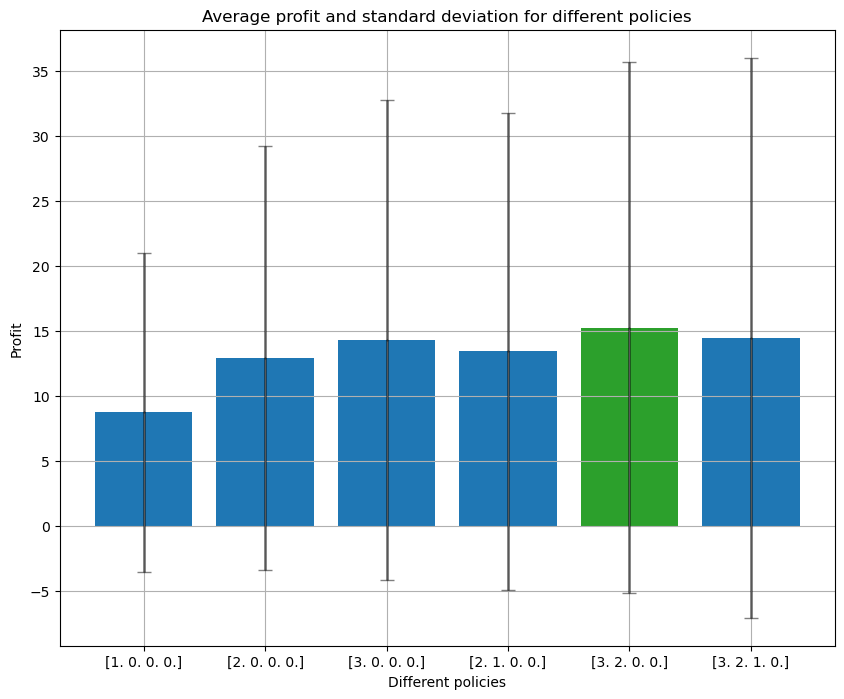

In [2]:
import matplotlib.pyplot as plt;

N = int(m*(m+1)/2)
x=np.arange(N)
y=mu_n
miny=np.min(y-np.sqrt(V_n)); miny = miny - np.mod(miny,10);
maxy=np.max(y+np.sqrt(V_n)); maxy = maxy - np.mod(maxy,10)+10;
yerr=np.sqrt(V_n)
width = 10
height = 8
plt.figure(figsize=(width, height))
mycolors = ['C0' for s in range(N)]; mycolors[best] = 'C2';
plt.bar(x, y, color=mycolors)
plt.title('Average profit and standard deviation for different policies')
plt.xticks(x, labels) #, rotation='vertical')
plt.yticks(np.arange(miny,maxy,5))
plt.grid()
plt.xlabel('Different policies')
plt.ylabel('Profit')
plt.errorbar(x, y, yerr, fmt='.', color='Black', elinewidth=2,capthick=1,errorevery=1, alpha=0.5, ms=1, capsize = 5)
# plt.savefig('aquarium-policies.png', transparent=True)
plt.show()

Observe the large variation compared to the expected profit. 
The risk of operating this business is huge!